In [27]:
import numpy as np

In [1]:
import imagej
ij = imagej.init('C:\\Users\\abril\\Andreas Eigene Dateien\\Programme\\Fiji.app', mode='interactive')
ij.ui().showUI()

In [ ]:
img = ij.py.active_xarray() 

In [48]:
imgnp = np.array(img)

In [8]:
print(img[0, :])

<xarray.DataArray array([[[112, 115, 116, ..., 114, 116, 115],
        [ 92, 126, 109, ..., 109, 115, 115],
        [113,  97, 109, ..., 106, 102, 112],
        ...,
        [108, 127, 100, ..., 109, 109, 114],
        [107, 106, 135, ..., 109, 107, 108],
        [114, 107, 117, ..., 111, 102, 112]],

       [[108, 107, 107, ..., 101, 103, 112],
        [107, 107,  99, ..., 100, 120, 126],
        [110,  98, 110, ..., 104, 119, 119],
        ...,
        [111, 106, 108, ..., 108, 113, 114],
        [110,  99,  95, ...,  93,  87, 101],
        [127,  97, 106, ..., 110, 120, 121]],

       [[108, 115, 111, ..., 115, 112, 111],
        [111, 102, 103, ..., 118, 101, 115],
        [104, 102,  99, ...,  98,  98, 122],
        ...,
        [108, 122, 115, ..., 110, 110, 106],
        [112, 115, 116, ..., 118, 103, 103],
        [111, 118, 113, ..., 117, 109, 109]],

       ...,

       [[115, 103, 123, ..., 116, 122, 112],
        [101, 101,  98, ...,  93,  99, 119],
        [107, 110, 117, 

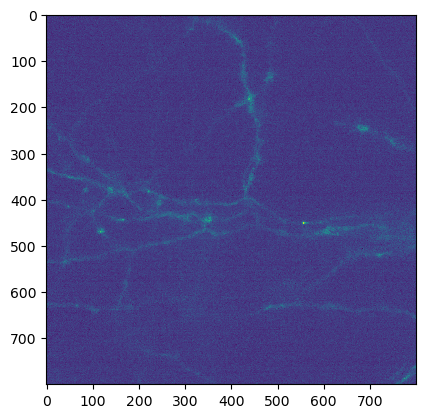

In [12]:
ij.py.show(img[100,:])

In [13]:
def plane(image, pos):
    """
    Slices an image plane at the given position.
    :param image: the image to slice
    :param pos: a dictionary from dimensional axis label to element index for that dimension
    """
    # Convert pos dictionary to position indices in dimension order.
    # See https://stackoverflow.com/q/39474396/1207769.
    p = tuple(pos[image.dims[d]] if image.dims[d] in pos else slice(None) for d in range(image.ndim))
    return image[p]
import ipywidgets

def _axis_index(image, *options):
    axes = tuple(d for d in range(image.ndim) if image.dims[d].lower() in options)
    if len(axes) == 0:
        raise ValueError(f"Image has no {options[0]} axis!")
    return axes[0]

def ndshow(image, cmap=None, x_axis=None, y_axis=None, immediate=False):
    if not hasattr(image, 'dims'):
        # We need dimensional axis labels!
        raise TypeError("Metadata-rich image required")

    # Infer X and/or Y axes as needed.
    if x_axis is None:
        x_axis = _axis_index(image, "x", "col")
    if y_axis is None:
        y_axis = _axis_index(image, "y", "row")

    # Build ipywidgets sliders, one per non-planar dimension.
    widgets = {}
    for d in range(image.ndim):
        if d == x_axis or d == y_axis:
            continue
        label = image.dims[d]
        widgets[label] = ipywidgets.IntSlider(description=label, max=image.shape[d]-1, continuous_update=immediate)

    # Create image plot with interactive sliders.
    def recalc(**kwargs):
        print("displaying")
        ij.py.show(plane(image, kwargs), cmap=cmap)
    ipywidgets.interact(recalc, **widgets)

In [15]:
ndshow(img)

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=450), Output()), _dom_c…

<xarray.DataArray array([[[112, 115, 116, ..., 114, 116, 115],
        [ 92, 126, 109, ..., 109, 115, 115],
        [113,  97, 109, ..., 106, 102, 112],
        ...,
        [108, 127, 100, ..., 109, 109, 114],
        [107, 106, 135, ..., 109, 107, 108],
        [114, 107, 117, ..., 111, 102, 112]],

       [[108, 107, 107, ..., 101, 103, 112],
        [107, 107,  99, ..., 100, 120, 126],
        [110,  98, 110, ..., 104, 119, 119],
        ...,
        [111, 106, 108, ..., 108, 113, 114],
        [110,  99,  95, ...,  93,  87, 101],
        [127,  97, 106, ..., 110, 120, 121]],

       [[108, 115, 111, ..., 115, 112, 111],
        [111, 102, 103, ..., 118, 101, 115],
        [104, 102,  99, ...,  98,  98, 122],
        ...,
        [108, 122, 115, ..., 110, 110, 106],
        [112, 115, 116, ..., 118, 103, 103],
        [111, 118, 113, ..., 117, 109, 109]],

       ...,

       [[115, 103, 123, ..., 116, 122, 112],
        [101, 101,  98, ...,  93,  99, 119],
        [107, 110, 117, 

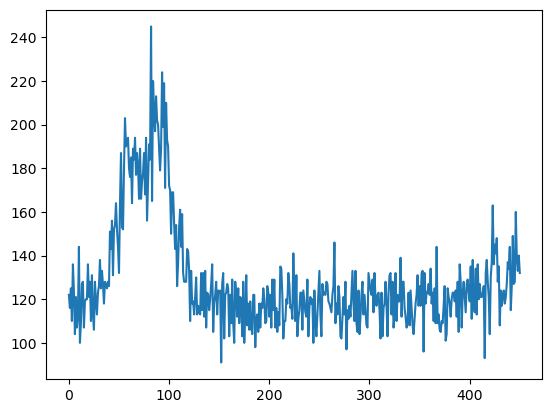

In [39]:
import matplotlib.pyplot as plt

plt.plot(np.array(img[:,445,169]))

In [50]:
m = np.mean(imgnp, axis=0)
print(m.shape)

(800, 800)


359.7339246119734 99.21729490022173
1.0 0.0


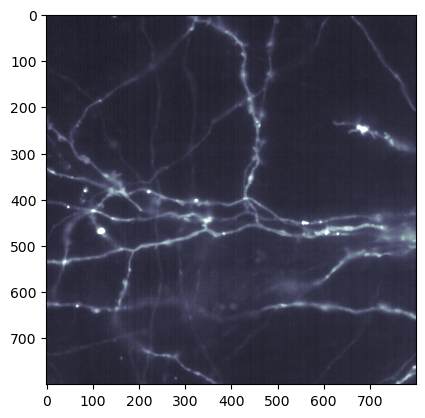

In [63]:
print(np.max(m), np.min(m))
m2 = (m-np.min(m))/(np.max(m)-np.min(m))
plt.imshow(m2, cmap="bone", vmax=0.2)
print(np.max(m2), np.min(m2))